In [124]:
from common import Fonts, Images, NWSL, Colors, add_signature
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

In [157]:
is_rank = True
filter_teams = True

In [158]:
raw = pd.read_csv("historical_ranks.csv")
raw

,season,team,rank,points,games,points_ratio
0,2013,WNY,1,38.0,22.0,0.575758
1,2013,KC,2,38.0,22.0,0.575758
2,2013,POR,3,38.0,22.0,0.575758
3,2013,GFC,4,36.0,22.0,0.545455
4,2013,BOS,5,30.0,22.0,0.454545
...,...,...,...,...,...,...
107,2024,SD,10,25.0,26.0,0.320513
108,2024,UTA,11,25.0,26.0,0.320513
109,2024,LA,12,24.0,26.0,0.307692
110,2024,RGN,13,23.0,26.0,0.294872


In [159]:
raw.sort_values("points_ratio", ascending=False)[0:8]

,season,team,rank,points,games,points_ratio
46,2018,NC,1,57.0,24.0,0.791667
98,2024,ORL,1,60.0,26.0,0.769231
8,2014,RGN,1,54.0,24.0,0.750000
100,2024,GFC,3,56.0,26.0,0.717949
99,2024,WAS,2,56.0,26.0,0.717949
17,2015,RGN,1,43.0,20.0,0.716667
101,2024,KCC,4,55.0,26.0,0.705128
26,2016,POR,1,41.0,20.0,0.683333


In [160]:
df = raw.pivot(index="team", columns="season", values=("rank" if is_rank else "points_ratio"))
df.columns.name = None
df = df.sort_values(by=[2024], ascending=is_rank)
if filter_teams:
    df = df.loc[~df[2024].isna()]
    for team, row in df.iterrows():
        for i, value in row[::-1].items():
            if np.isnan(value):
                df.loc[
                    team, filter(lambda x: x != 2020, range(min(df.columns), i))
                ] = None
                break
df

,2013,2014,2015,2016,2017,2018,2019,2021,2022,2023,2024
team,,,,,,,,,,,
ORL,NaN,NaN,NaN,9.0,3.0,7.0,9.0,8.0,10.0,7.0,1.0
WAS,8.0,5.0,4.0,2.0,10.0,8.0,5.0,3.0,11.0,8.0,2.0
GFC,4.0,6.0,8.0,7.0,6.0,9.0,8.0,5.0,12.0,6.0,3.0
KCC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,5.0,11.0,4.0
NC,NaN,NaN,NaN,NaN,1.0,1.0,1.0,6.0,7.0,3.0,5.0
POR,3.0,3.0,6.0,1.0,2.0,2.0,3.0,1.0,2.0,2.0,6.0
BAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
CHI,6.0,4.0,2.0,3.0,4.0,4.0,2.0,4.0,6.0,12.0,8.0
LOU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,9.0,9.0


In [161]:
seasons = list(df.columns).copy()
seasons_index = list(range(0, len(df.columns)))
df.columns = seasons_index

<Figure size 6400x4000 with 0 Axes>

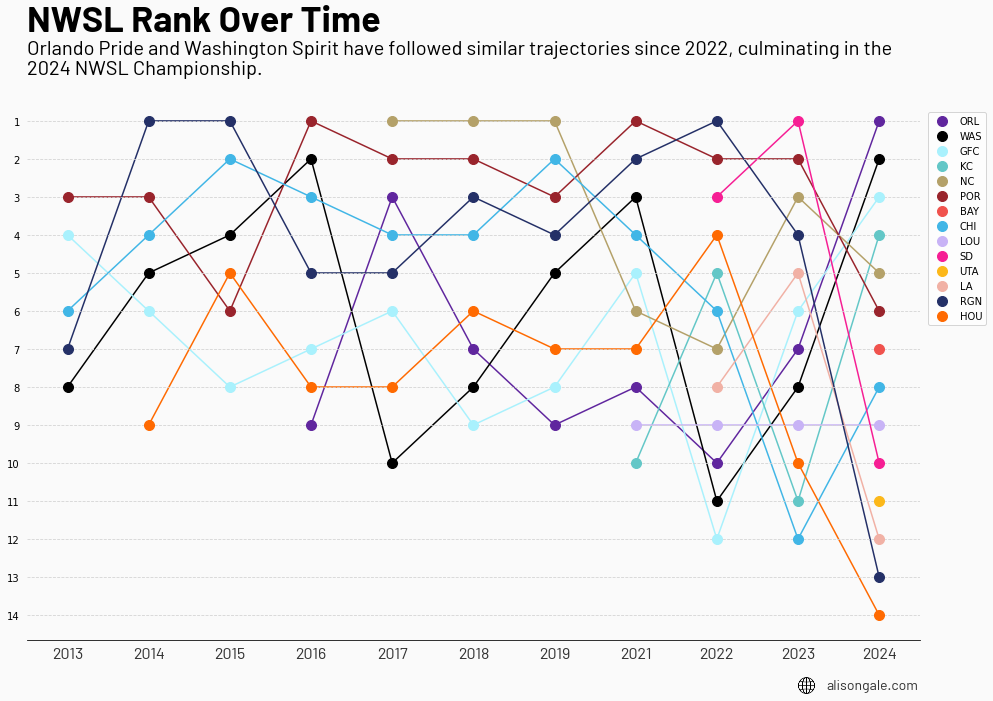

In [162]:
# Setup
plt.rcParams["figure.figsize"] = (16, 10)
plt.figure(dpi=400)
fig, ax = plt.subplots()
fig.patch.set_facecolor(Colors.WHITE)
ax.set_facecolor(Colors.WHITE)

# Plot data
for i, row in df.iterrows():
    row = row.dropna()
    ax.plot(row.index, row.values, color=NWSL.color(i), zorder=0)
    
for i, row in df.iterrows():
    row = row.dropna()
    ax.scatter(
        row.index,
        row.values,
        color=NWSL.color(i),
        s=100,
        label="KC" if i == "KCC" else i,
        zorder=1,
    )

# Add axes
ax.spines[["top", "right", "left"]].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)

ax.set_xticks(seasons_index)
ax.set_xticklabels(
    seasons,
    fontproperties=Fonts.BARLOW,
    size=16,
    color=Colors.BLACK,
)

if is_rank:
    ax.set_yticks(range(1, 15))
    ax.invert_yaxis()
ax.yaxis.grid(True, color=Colors.LIGHT_GRAY, linestyle="--")

# Legend
ax.legend(bbox_to_anchor=(1.08, 0.98))

# Title
plt.figtext(
    0.125,
    0.97,
    "NWSL Rank Over Time" if is_rank else "NWSL Points Over Time",
    fontproperties=Fonts.BARLOW_BOLD,
    size=36,
    ha="left",
)

# Subtitle
plt.figtext(
    0.125,
    0.91,
    "Orlando Pride and Washington Spirit have followed similar trajectories since 2022, culminating in the\n2024 NWSL Championship."
    if is_rank
    else "Before this season only three teams earned 70% of available points. Four teams (Orlando, Gotham,\nWashington, and Kansas City) achieved that milestone in 2024.",
    fontproperties=Fonts.BARLOW,
    size=20,
    ha="left",
)

# Save image
add_signature(fig, x=0.79, y=0.05, fs=14, w=0.023)
filename = "historical_rankings"
if filter_teams:
    filename += "_filtered"
filename += "_rank" if is_rank else "_points"
plt.savefig("images/" + filename + ".png", bbox_inches="tight", pad_inches=0.5, dpi=400)